In [1]:
from scripts.halo_analysis_scripts import *
%matplotlib inline

palettable colormaps are not installed
don't have phil's colormaps


In [75]:
def plot_mass_fraction(particle_types_num=[0], flabel='gas', ylim=(-2.0,1.0), legendFlag=True, particle_types=[0,1,2,4,5], zbinwidth = 0.5, rbins=np.power(10, np.arange(np.log10(0.005258639741921723), np.log10(3), 0.05))):
    rmid = (rbins[:-1]+rbins[1:])/2 #in units of Rvir
    
    fig, axes = plt.subplots(1, 5, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*5,4.8*1], dpi=150, facecolor='w')
    cmaps = {'h206':plt.cm.Blues, 'h29':plt.cm.Greens, 'h113':plt.cm.Reds, 'h2':plt.cm.Purples}
    indices = {'h206':0, 'h29':1, 'h113':2, 'h2':3}

    for halo, snapdir in Quest_sims['nofb'].items():
        cmap = cmaps[halo]
        simname = os.path.basename(snapdir)
        allprofiles = h5todict(f'data/{simname}_allprofiles_widezbins.h5')

        cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

        for z0, c in zip( sorted(allprofiles.keys()), cmap(np.linspace(0.1,1,len(allprofiles.keys())))[::-1] ):
            fbarr = []
            for k in allprofiles[z0].keys():
                totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
                nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
                with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
                fbarr.append(fb)
            z0n = float(z0.split('z0_')[1])
            axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
            axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)
            assert np.array_equal(allprofiles[z0][k]['rmid'], rmid)

        if legendFlag: axes[indices[halo]+1].legend(loc=4)
        axes[indices[halo]+1].set_title(simname)

    for ax in axes: ax.axhline(0, ls='--', c='k', zorder=-1)
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[0].set_ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
    axes[0].set_ylim(ylim)

/tmp/ipykernel_21682/431126959.py:23: RuntimeWarning: divide by zero encountered in log10
  axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
/tmp/ipykernel_21682/431126959.py:24: RuntimeWarning: divide by zero encountered in log10
  axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)


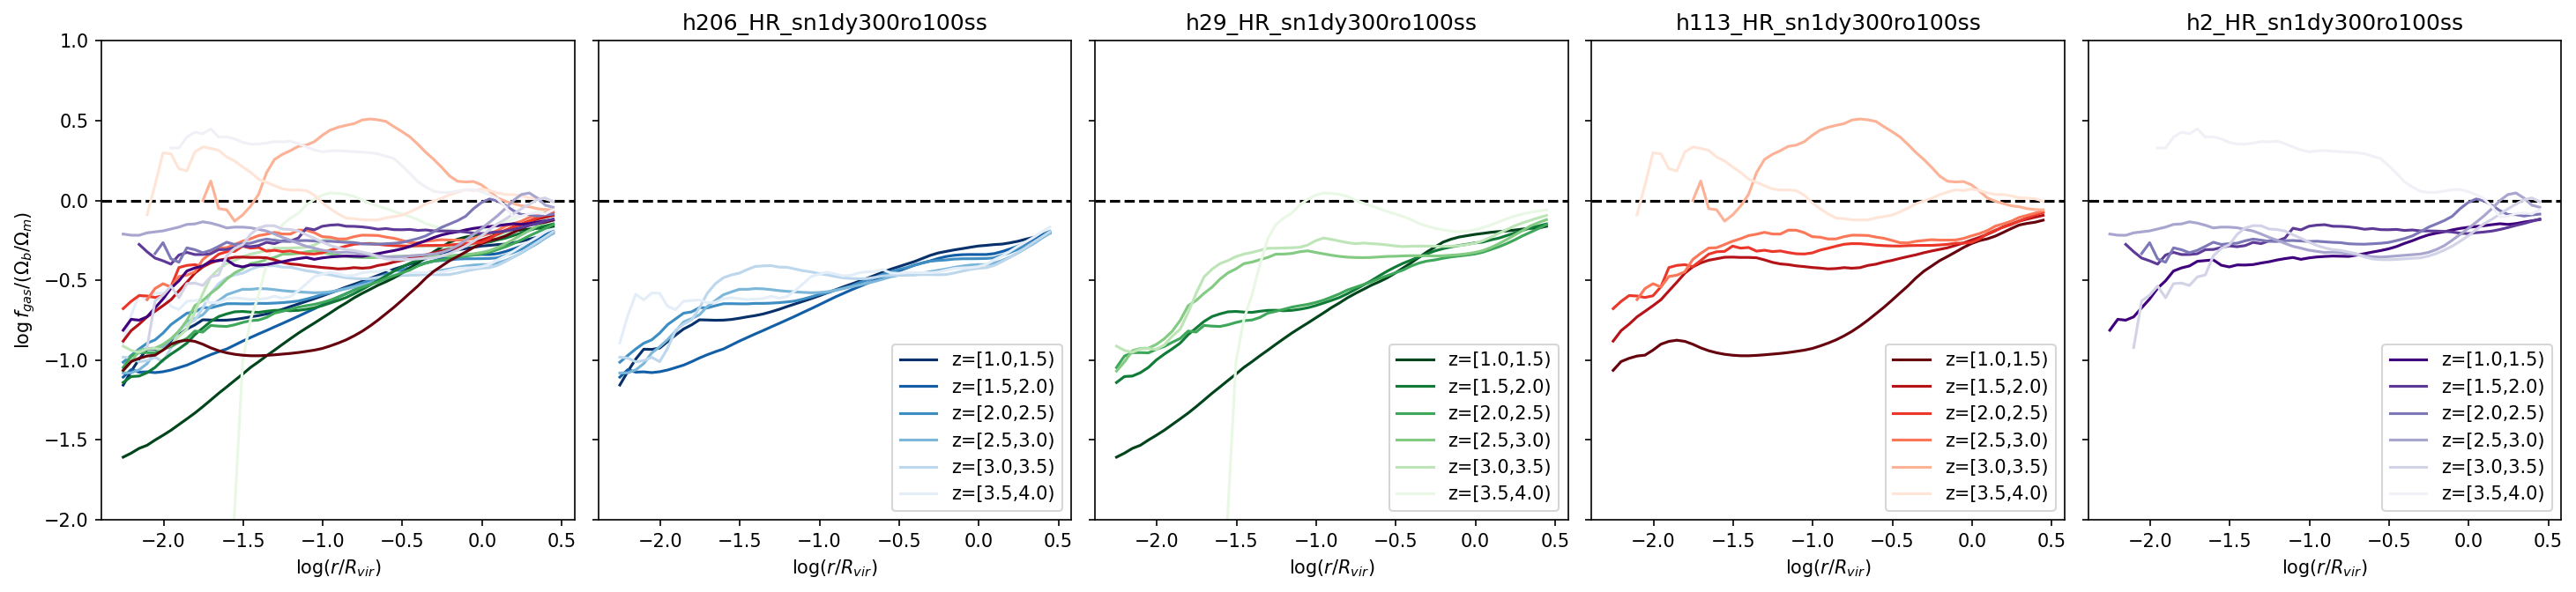

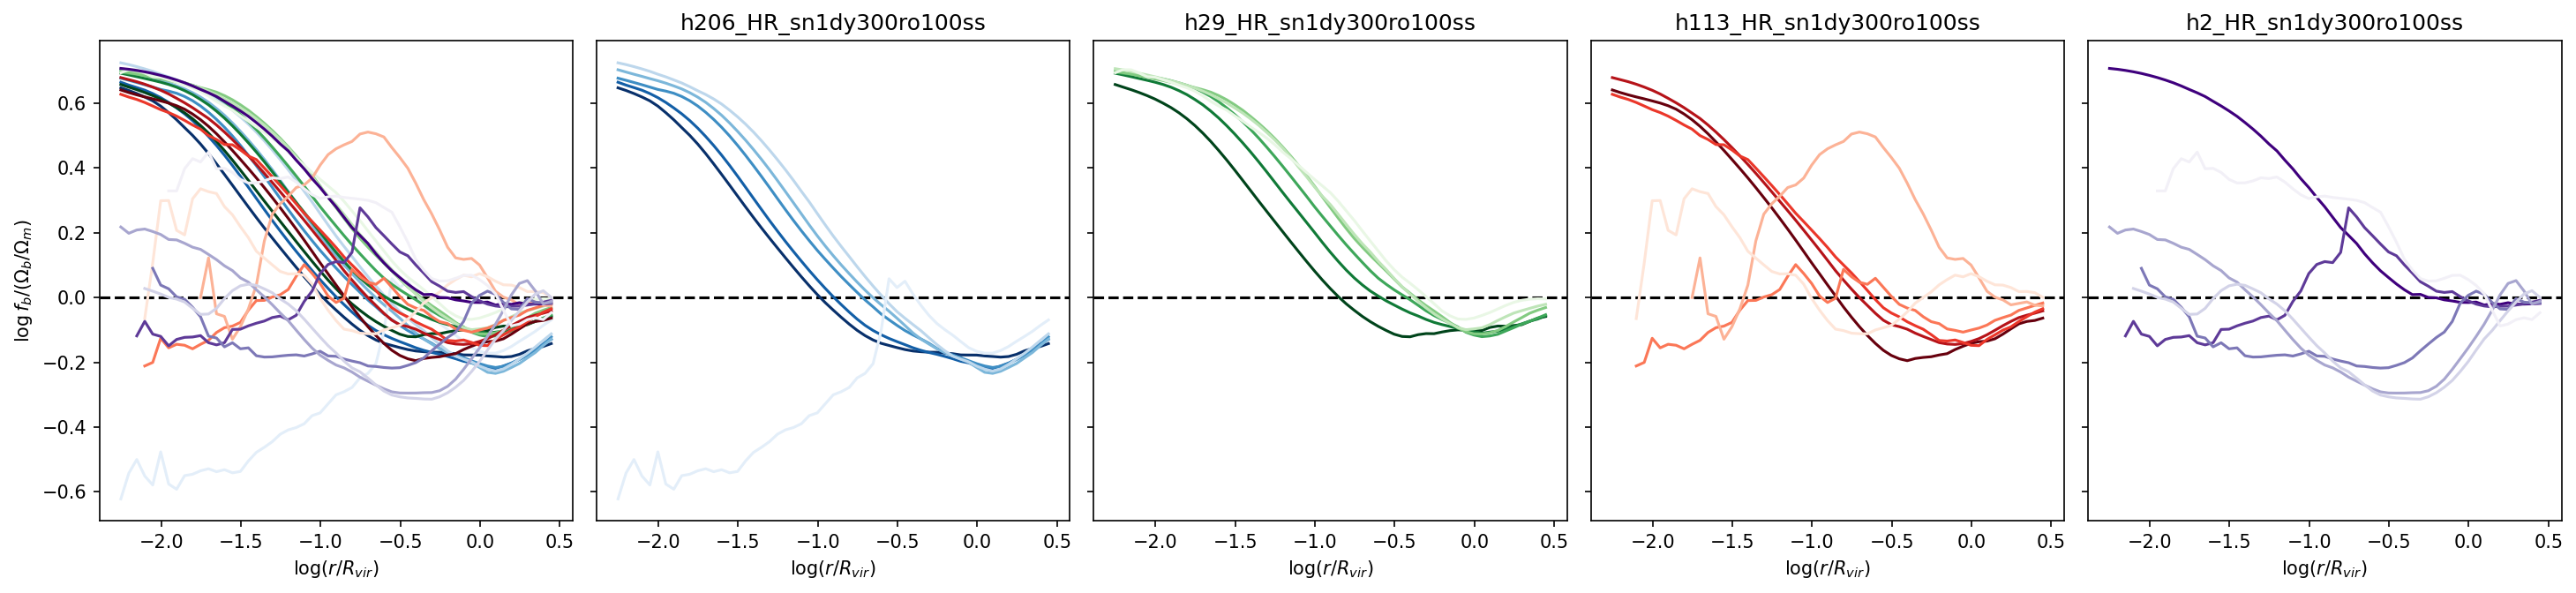

In [76]:
plot_mass_fraction()
plot_mass_fraction([0,4], 'b', None, False)